# Prediction of Smoking and Drinking Behaviors Using NHIS Korea Dataset
# Minju Kim

# 1. EDA (Exploratory Data Analysis)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv("/content/smoking_driking_dataset_Ver01.csv")

data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


- Data Description:
1. Source: This dataset is sourced from the National Health Insurance Service in Korea.

2. Privacy: All personal and sensitive information has been excluded.

- Dataset Purpose:

1. To analyze body signals.
2. To classify individuals based on their smoking and drinking habits.

- Dataset Details:
1. "Sex"	Gender of the individual: Male or Female.
2. "Age"	Age of the individual, rounded up to the nearest 5 years.
3. "Height"	Height of the individual, rounded up to the nearest 5 cm.
4. "Weight"	Weight of the individual in kilograms (kg).
5. "Sight_left"	Eyesight measure for the left eye.
6. Sight_right	Eyesight measure for the right eye.
7. Hear_left	Hearing status for the left ear: 1 (Normal), 2 (Abnormal).
8. Hear_right	Hearing status for the right ear: 1 (Normal), 2 (Abnormal).
9. SBP	Systolic blood pressure in mmHg.
10. DBP	Diastolic blood pressure in mmHg.
11. BLDS	Fasting blood glucose level in mg/dL.
12. Tot_chole	Total cholesterol level in mg/dL.
13. HDL_chole	HDL cholesterol level in mg/dL.
14. LDL_chole	LDL cholesterol level in mg/dL.
15. Triglyceride	Triglyceride level in mg/dL.
16. Hemoglobin	Hemoglobin concentration in g/dL.
17. Urine_protein	Protein presence in urine, ranging from 1(-) to 6(+4).
18. Serum_creatinine	Blood creatinine concentration in mg/dL.
19. SGOT_AST	SGOT or AST level in IU/L.
20. SGOT_ALT	ALT enzyme level in IU/L.
21. Gamma_GTP	Gamma-glutamyl transpeptidase level in IU/L.
22. SMK_stat_type_cd	Smoking status: 1 (Never Smoked), 2 (Ex-Smoker), 3 (Smoker).
23. DRK_YN	Drinking status: Y (Drinker), N (Non-Drinker).

- The categorical columns: "sex", "hear_left", "hear_right", "SMK_stat_type_cd", and "DRK_YN"



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [ ]:
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 sex                 0
age                 0
height              0
weight              0
waistline           0
sight_left          0
sight_right         0
hear_left           0
hear_right          0
SBP                 0
DBP                 0
BLDS                0
tot_chole           0
HDL_chole           0
LDL_chole           0
triglyceride        0
hemoglobin          0
urine_protein       0
serum_creatinine    0
SGOT_AST            0
SGOT_ALT            0
gamma_GTP           0
SMK_stat_type_cd    0
DRK_YN              0
dtype: int64


- No missing values exist in this data set.

In [ ]:
print("Statistical Summary:\n", data.describe())

Statistical Summary:
                  age         height         weight      waistline  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean       47.614491     162.240625      63.284050      81.233358   
std        14.181339       9.282957      12.514241      11.850323   
min        20.000000     130.000000      25.000000       8.000000   
25%        35.000000     155.000000      55.000000      74.100000   
50%        45.000000     160.000000      60.000000      81.000000   
75%        60.000000     170.000000      70.000000      87.800000   
max        85.000000     190.000000     140.000000     999.000000   

          sight_left    sight_right      hear_left     hear_right  \
count  991346.000000  991346.000000  991346.000000  991346.000000   
mean        0.980834       0.978429       1.031495       1.030476   
std         0.605949       0.604774       0.174650       0.171892   
min         0.100000       0.100000       1.000000       1.000000   
25%        

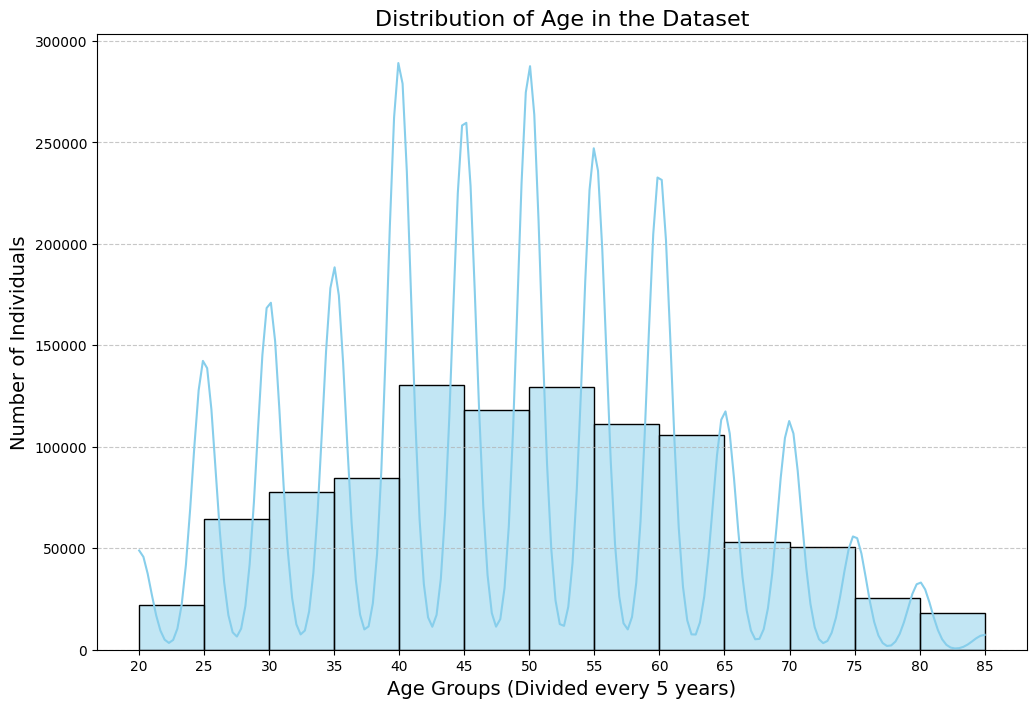

In [ ]:
# Enhancing the age distribution plot with clearer labels and more detailed age group division
plt.figure(figsize=(12, 8))
sns.histplot(data['age'], bins=range(data['age'].min(), data['age'].max() + 1, 5), kde=True, color='skyblue')
plt.title('Distribution of Age in the Dataset', fontsize=16)
plt.xlabel('Age Groups (Divided every 5 years)', fontsize=14)
plt.ylabel('Number of Individuals', fontsize=14)
plt.xticks(range(data['age'].min(), data['age'].max() + 1, 5))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the age distribution graph of your dataset, we can derive several insights:

1. Age Range and Concentration: The histogram shows the range of ages present in the dataset and which age groups are most heavily represented. There are noticeable peaks in certain age groups, indicating a higher concentration of individuals in those age brackets.

2. Population Demographics: The distribution of age can reveal the demographic characteristics of the dataset. For example, if there's a significant representation of middle-aged or older individuals, it might suggest a dataset that is skewed towards an older demographic.

3. Potential Impact on Health Metrics: Different age groups have varying health profiles. For instance, blood pressure, cholesterol levels, and blood sugar levels tend to vary with age. An older population might naturally have more variability in these measures, potentially leading to more outliers.

Now, relating these insights to the presence of outliers in other columns of the dataset:

- Age-Related Health Variations: As people age, they are more likely to experience changes in health metrics such as blood pressure, cholesterol, and blood glucose levels. If your dataset has a significant proportion of older individuals, this might explain the presence of outliers in health-related columns. Older individuals are more likely to have health conditions that result in measurements that deviate significantly from the mean, thus appearing as outliers.

- Lifestyle Factors with Age: Lifestyle factors like diet, exercise, smoking, and drinking habits, which can significantly impact health metrics, often vary with age. For instance, an age group with a higher prevalence of smokers or drinkers might show different patterns in health metrics, contributing to outliers.

- Data Representation: If certain age groups are over or under-represented, it can skew the data, leading to more apparent outliers. For example, if the dataset disproportionately represents older individuals, health metrics associated with aging might appear as outliers.

In summary, the age distribution of your dataset can indeed provide context for understanding why outliers might be present in health-related columns. Age influences a wide range of physiological and lifestyle factors, which in turn can impact health metrics, leading to variations and outliers in the data.

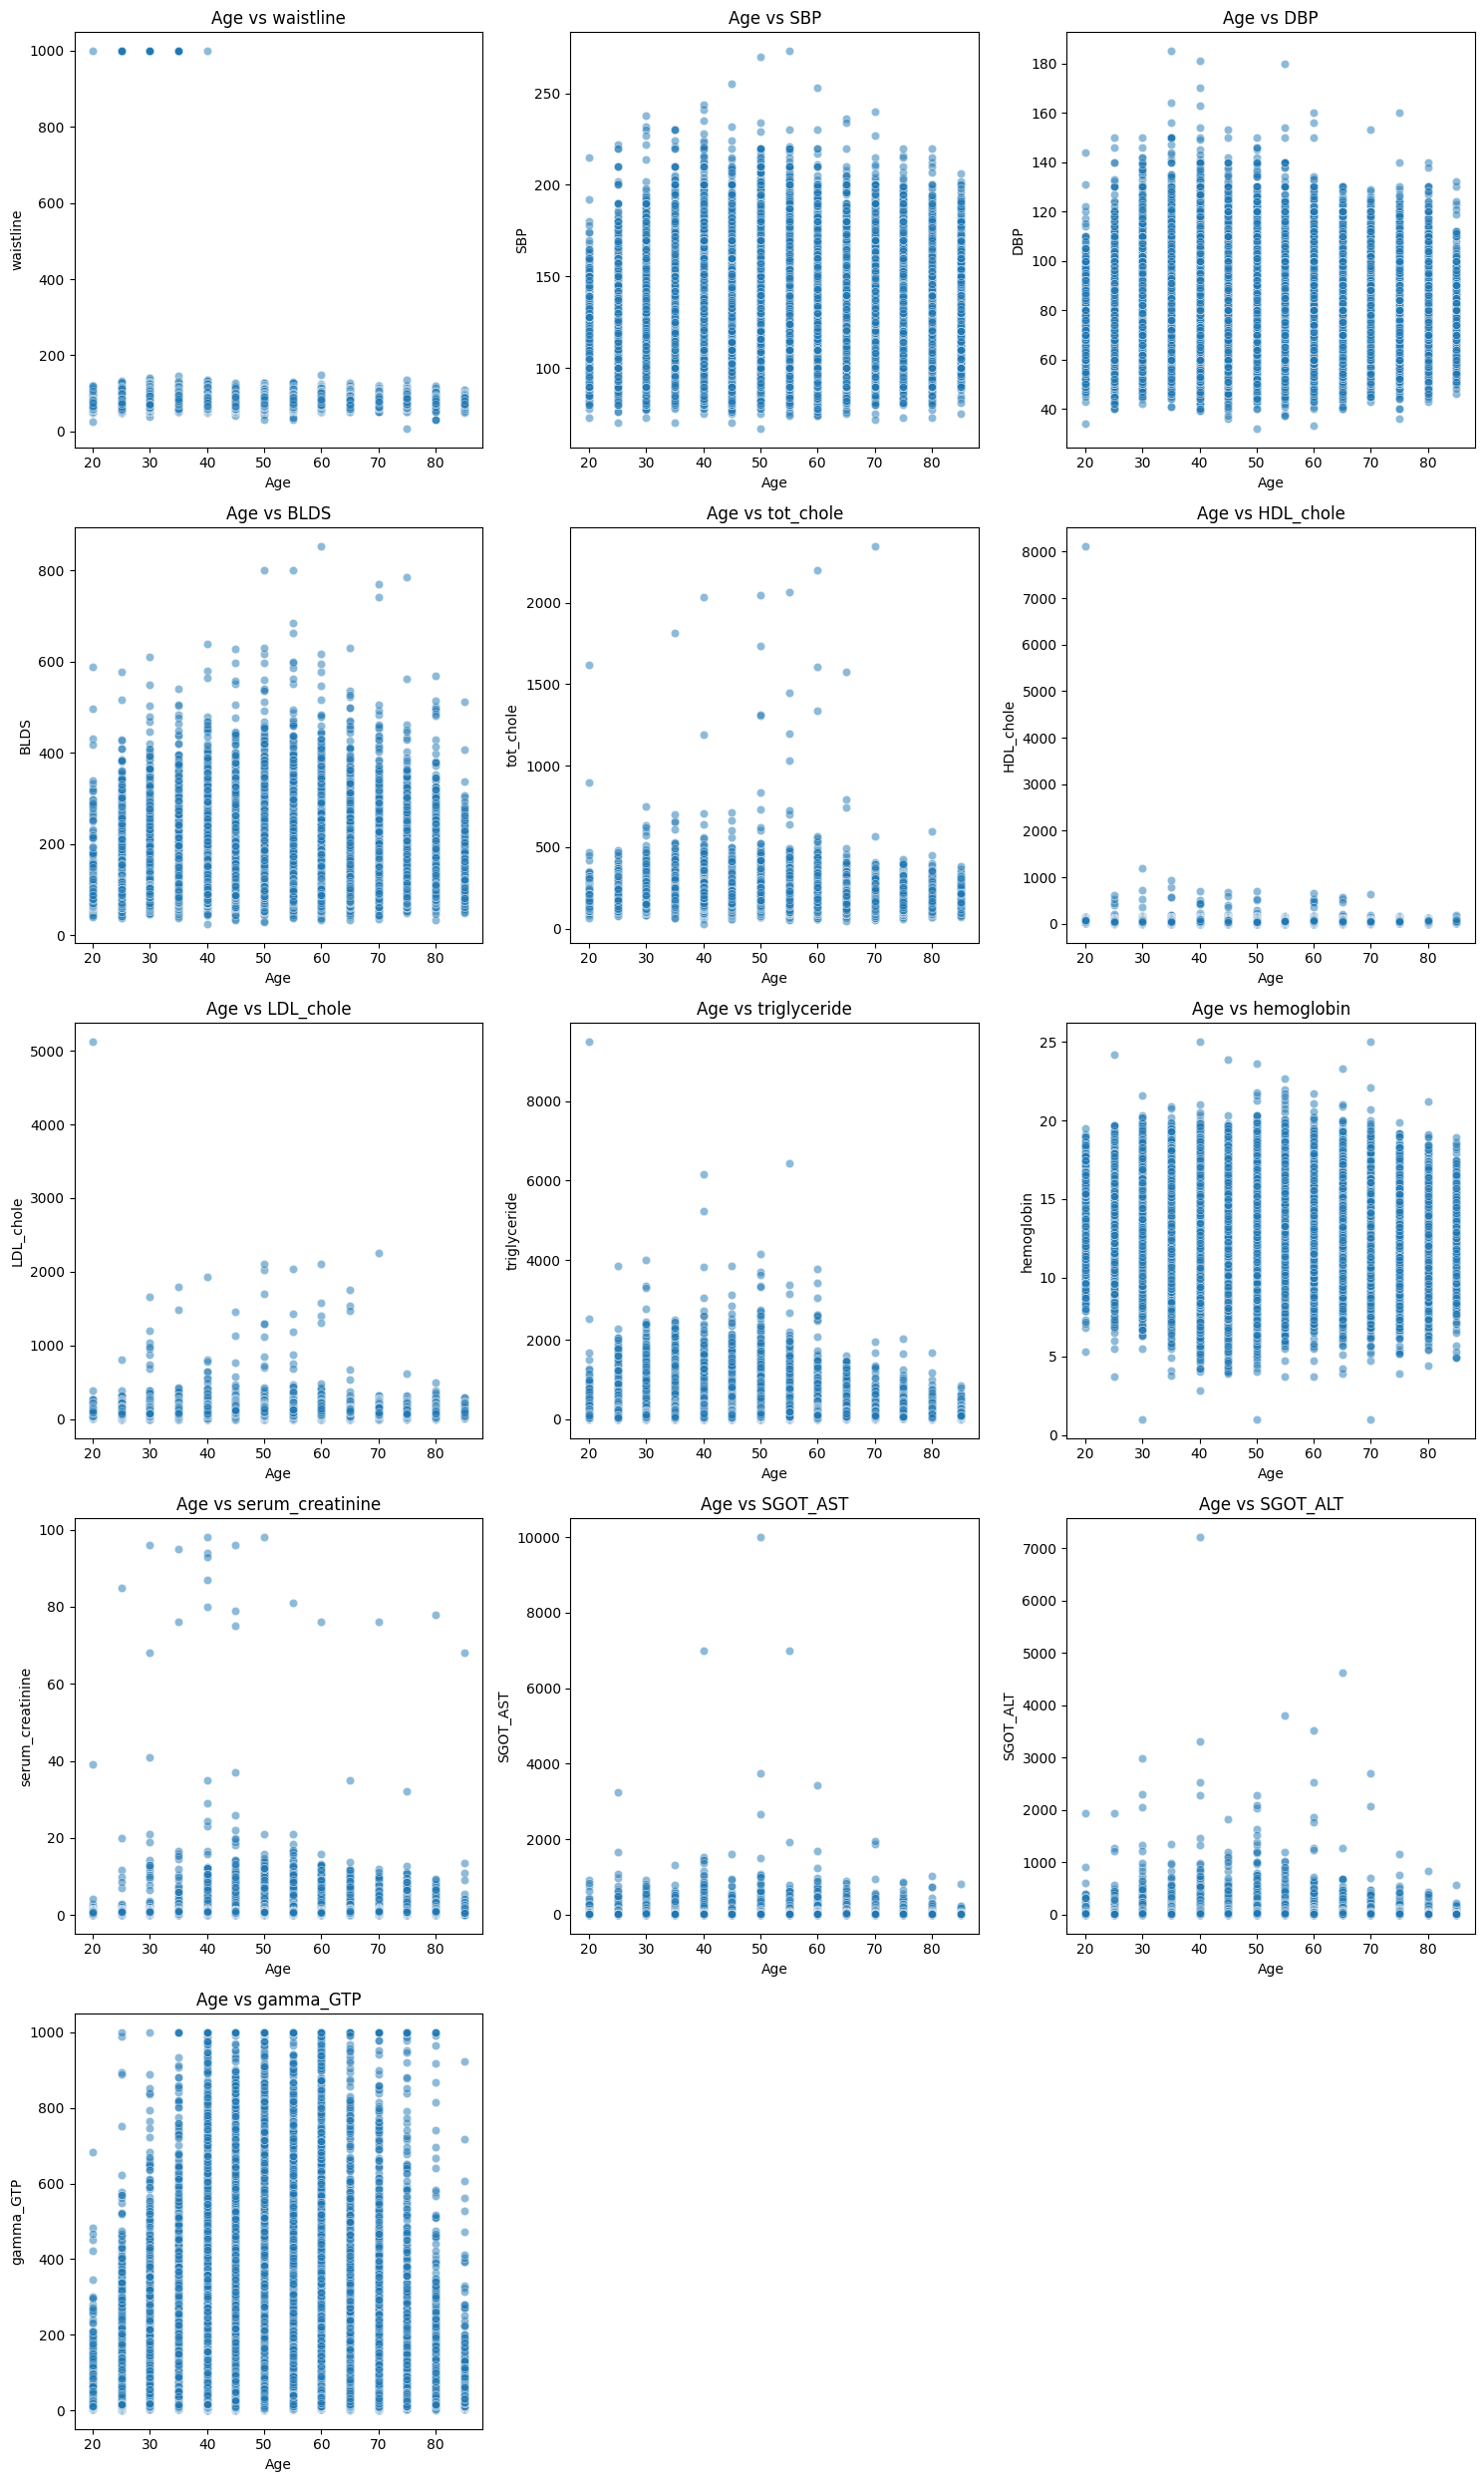

In [ ]:
# Selecting columns with many outliers and the age column for plotting
columns_with_outliers = [
    "waistline", "SBP", "DBP", "BLDS", "tot_chole",
    "HDL_chole", "LDL_chole", "triglyceride", "hemoglobin",
    "serum_creatinine", "SGOT_AST", "SGOT_ALT", "gamma_GTP"
]

# Plotting scatter plots for each of these columns against age
num_cols = 3
num_rows = len(columns_with_outliers) // num_cols + (1 if len(columns_with_outliers) % num_cols else 0)
plt.figure(figsize=(15, num_rows * 5))

for index, column in enumerate(columns_with_outliers, 1):
    plt.subplot(num_rows, num_cols, index)
    sns.scatterplot(x=data['age'], y=data[column], alpha=0.5)
    plt.title(f'Age vs {column}')
    plt.xlabel('Age')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

###Analyzing the scatter plot with "age" column and columns with outliers
1. Age vs Waistline:

- There is a general increase in waistline with age, especially noticeable after middle age.
- Outliers with very high waistline measurements are present across all age groups but are more pronounced in middle to older age groups.
Age vs SBP (Systolic Blood Pressure):

2. SBP tends to increase with age.
- There are outliers with extremely high SBP across various age groups, more so in the older population.
3. Age vs DBP (Diastolic Blood Pressure):

- DBP shows less clear age-related trends compared to SBP.
- Outliers are present in all age groups, indicating individual variations in DBP.
4. Age vs BLDS (Fasting Blood Glucose Level):

- There doesn't appear to be a strong age trend in fasting blood glucose levels.
- There are significant outliers, particularly very high glucose levels, which could indicate cases of diabetes or pre-diabetes.
5. Age vs Tot_Chole (Total Cholesterol Level):

- Total cholesterol levels don't show a clear trend with age.
- Outliers are present in all age groups, with some individuals having very high cholesterol levels.
6. Age vs HDL_Chole (HDL Cholesterol Level):

- HDL cholesterol levels show variability but no clear trend with age.
- Outliers exist, especially in lower HDL levels, which could be a risk factor for heart diseases.
7. Age vs LDL_Chole (LDL Cholesterol Level):

- LDL cholesterol levels also show variability across age groups without a clear trend.
- Presence of outliers, particularly high LDL levels, which are a concern for cardiovascular health.
8. Age vs Triglyceride:

- Triglyceride levels do not show a consistent trend with age.
- Notable outliers, particularly high levels, could indicate metabolic health issues.
9. Age vs Hemoglobin:

- Hemoglobin levels are fairly consistent across age groups.
- Outliers are present, indicating conditions like anemia or polycythemia.
10. Age vs Serum_Creatinine:

- Serum creatinine levels show some variability with age, potentially increasing in older age groups.
- Outliers are indicative of kidney function issues.
11. Age vs SGOT_AST (Aspartate Aminotransferase):

- No clear age trend for SGOT_AST levels.
- Outliers could indicate liver damage or muscle injury.
12. Age vs SGOT_ALT (Alanine Aminotransferase):

- Similar to SGOT_AST, no distinct age-related trend is observed.
- Outliers, particularly high levels, are often associated with liver issues.
13. Age vs Gamma_GTP (Gamma-Glutamyl Transpeptidase):

- No clear trend with age.
- Significant outliers, particularly high values, can indicate liver diseases or alcohol consumption.

In [ ]:
# Checking for zero or negative values in columns with outliers
columns_with_outliers_zero_negative = {column: (data[column] <= 0).any() for column in columns_with_outliers}

columns_with_outliers_zero_negative

{'waistline': False,
 'SBP': False,
 'DBP': False,
 'BLDS': False,
 'tot_chole': False,
 'HDL_chole': False,
 'LDL_chole': False,
 'triglyceride': False,
 'hemoglobin': False,
 'serum_creatinine': False,
 'SGOT_AST': False,
 'SGOT_ALT': False,
 'gamma_GTP': False}

None of the columns with outliers in your dataset contain zero or negative values. This means that transformation methods like logarithmic or Box-Cox transformations can be applied without the need for preliminary adjustments to handle zero or negative values. Such transformations can be effective in reducing the skewness and impact of outliers in your data. ​​

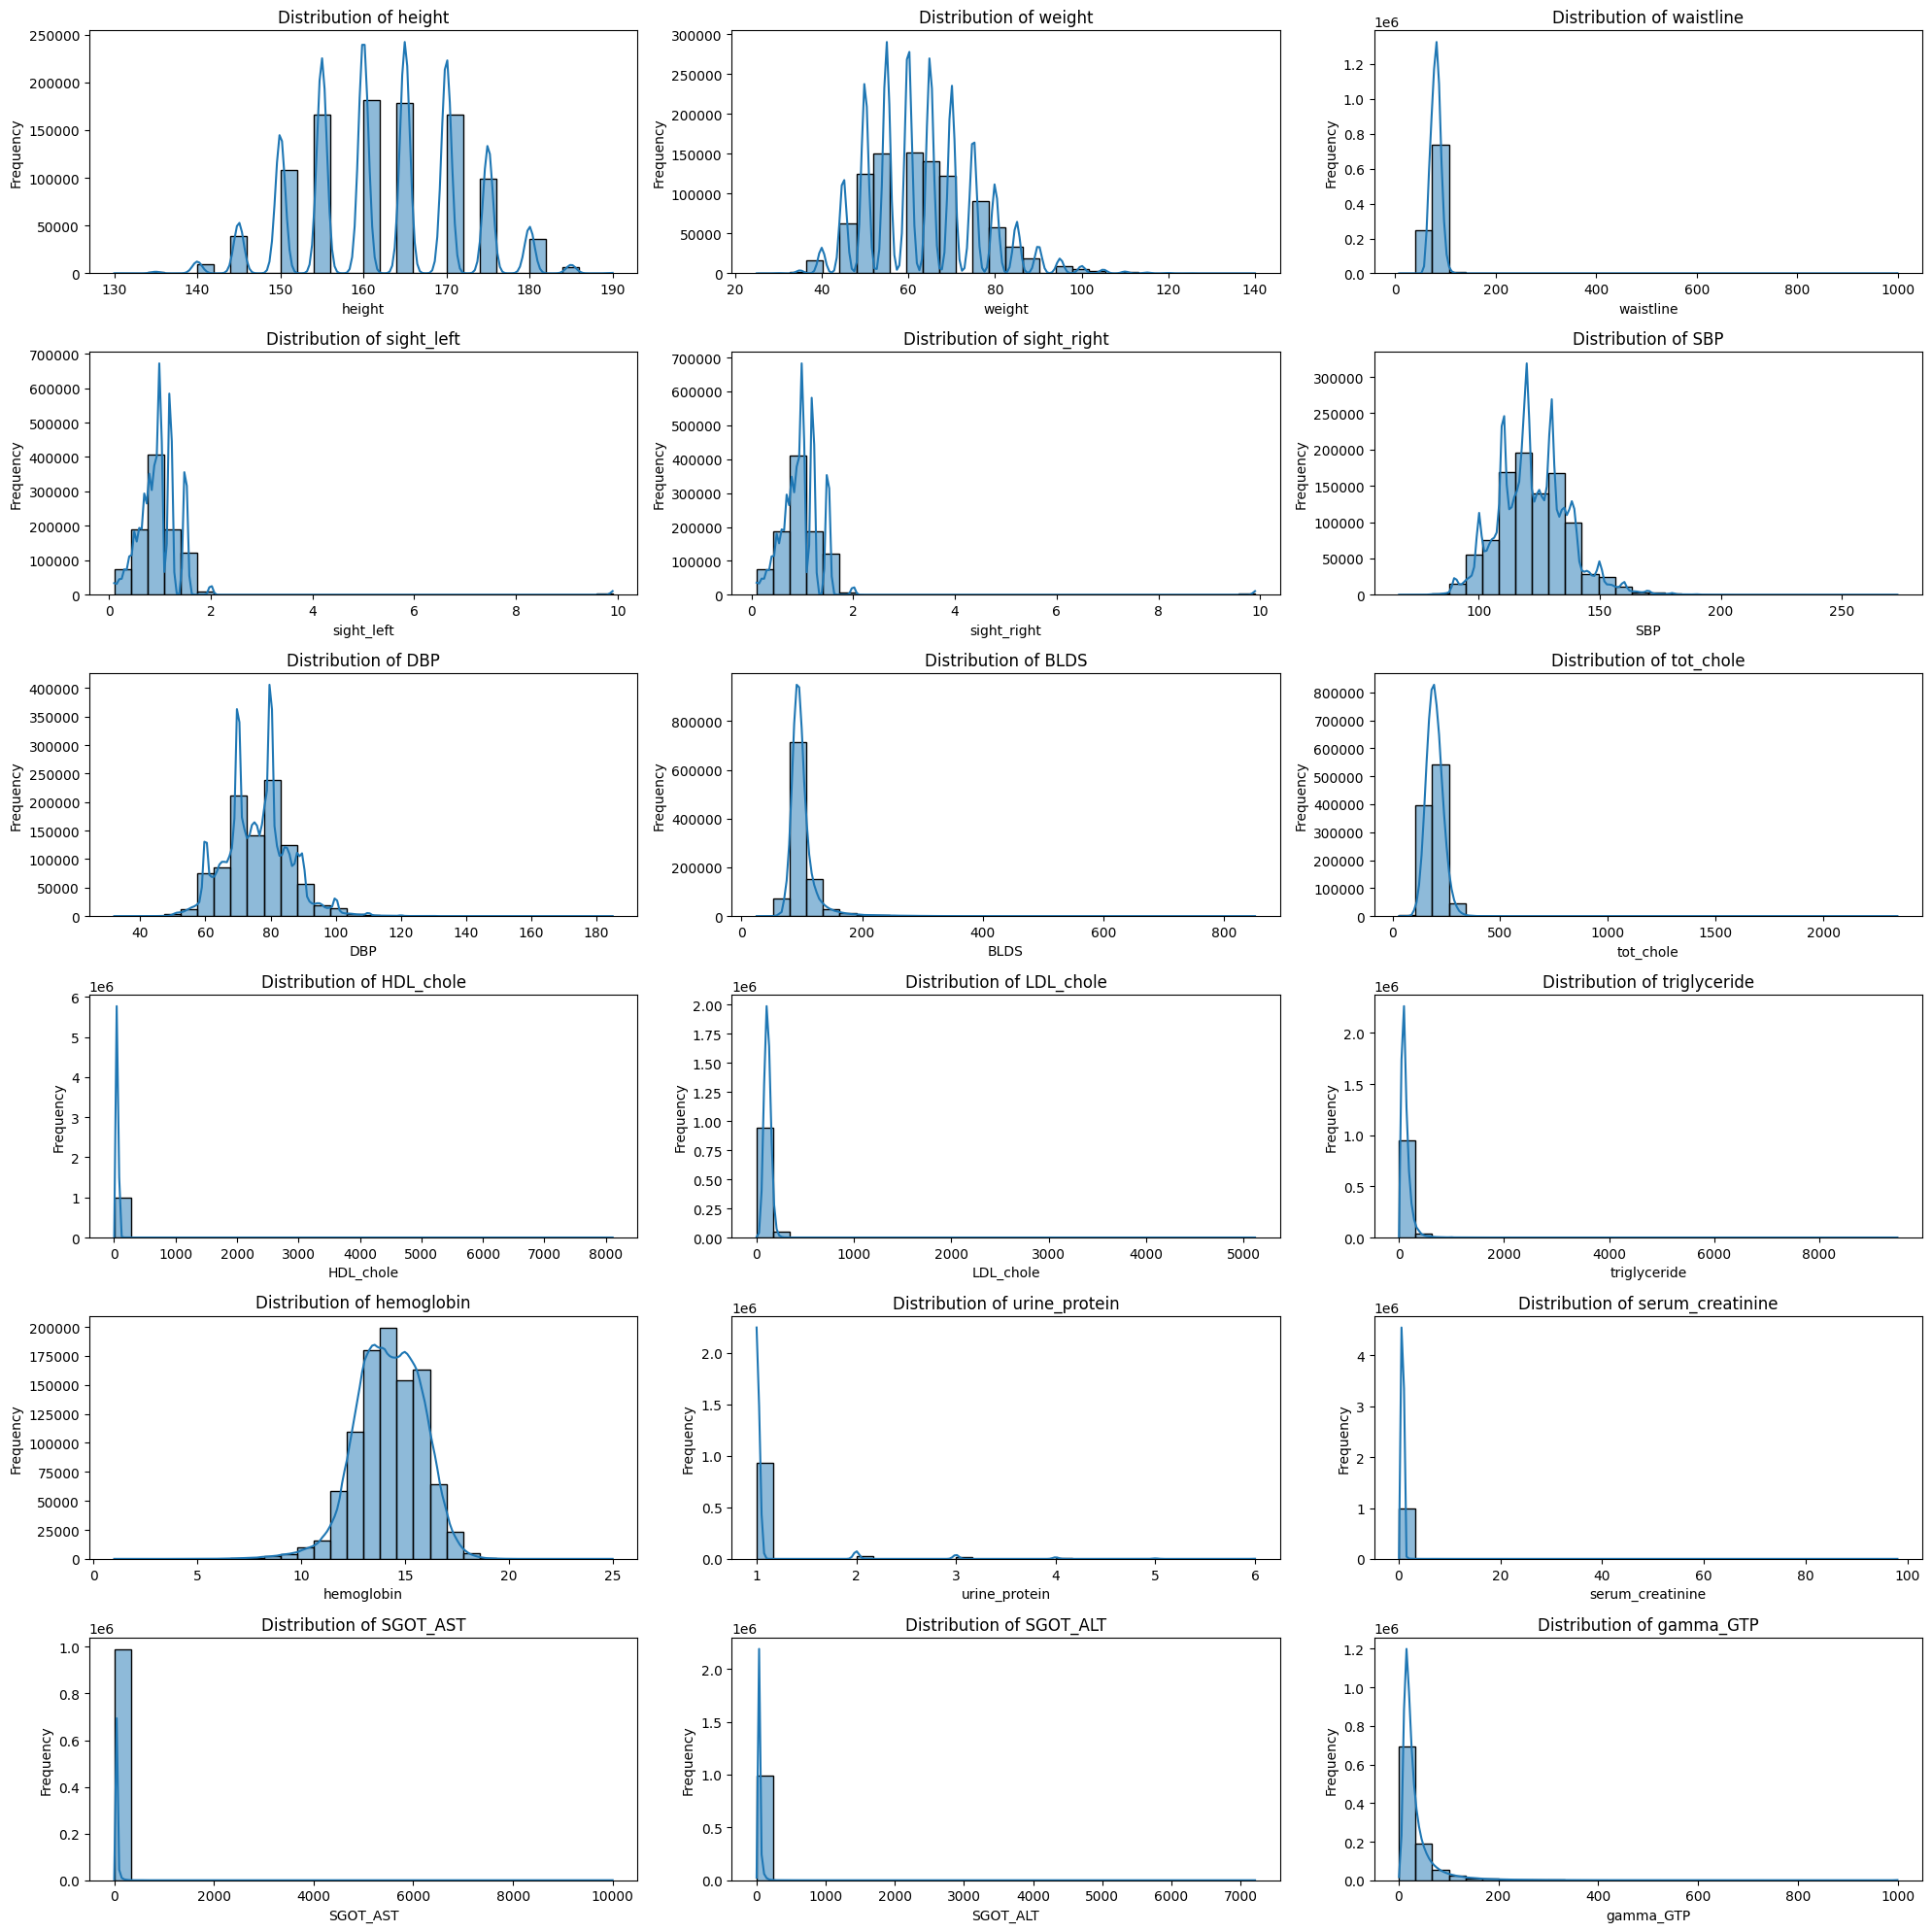

In [ ]:
# Plotting the distribution for the remaining columns
numeric_columns = [
    'height', 'weight', 'waistline', 'sight_left', 'sight_right',
    'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole',
    'LDL_chole', 'triglyceride', 'hemoglobin', 'urine_protein',
    'serum_creatinine', 'SGOT_AST', 'SGOT_ALT', 'gamma_GTP'
]

plt.figure(figsize=(20, 20))

for i, column in enumerate(numeric_columns, 1):
    plt.subplot(6, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution of the columns with numeric values
1. Height:

- Distribution: Appears to be fairly symmetric with a slight peak.
- Outliers: Minimal extreme values.
- Handling Method: Outliers are not significant; no transformation is likely needed.
2. Weight:

- Distribution: Right-skewed with a long tail towards higher values.
- Outliers: Noticeable at the higher end.
- Handling Method: Logarithmic or square root transformation can help reduce the skewness and impact of high-weight outliers.
3. Waistline:

- Distribution: Right-skewed similar to weight.
- Outliers: Prominent at the higher end.
- Handling Method: Logarithmic or square root transformation would be suitable to handle these outliers.
4. Sight_Left:

- Distribution: These distributions are not typical; they show multiple peaks, which might be due to the way eyesight is measured and categorized.
- Outliers: Not clearly distinguishable due to the nature of the distribution.
- Handling Method: Given the categorical-like nature of the data, transformations might not be appropriate. Instead, consider binning or categorizing these variables.

5. Sight_Right:

- Distribution: These distributions are not typical; they show multiple peaks, which might be due to the way eyesight is measured and categorized.
- Outliers: Not clearly distinguishable due to the nature of the distribution.
- Handling Method: Given the categorical-like nature of the data, transformations might not be appropriate. Instead, consider binning or categorizing these variables.

6. SBP (Systolic Blood Pressure):

- Insight: The distribution appears roughly symmetric with a slight right skew. It shows a clear central tendency with some outliers towards the higher end.
- Outliers: Yes, particularly on the higher end.
- Handling Method: A square root transformation might be more appropriate than a logarithmic one, as it is milder and can effectively handle the slight skewness.
7. DBP (Diastolic Blood Pressure):

- Insight: This distribution also looks relatively symmetric, similar to SBP, but with a less pronounced skew. It shows a clear central tendency with some outliers on the higher end.
- Outliers: Few, if any, significant outliers are noticeable.
- Handling Method: Given its near-normal distribution, extensive transformation might not be necessary. If needed, consider mild transformations like square root or robust scaling methods.
8. BLDS (Fasting Blood Glucose Level):

- Insight: The distribution is right-skewed, with most values concentrated on the lower end and a tail extending towards higher values.
- Outliers: Yes, especially high fasting blood glucose levels.
- Handling Method: A logarithmic transformation would be effective to reduce skewness and the impact of these high-value outliers.
9. Tot_Chole (Total Cholesterol Level):

- Insight: The distribution shows a right skew, though not as pronounced as in some other variables. Most values cluster at the lower end with a tail of higher values.
- Outliers: Yes, there are outliers on the higher end of the spectrum.
- Handling Method: A logarithmic transformation could be suitable, but given the less extreme skew, a square root transformation might also be effective.
10. HDL_Chole (HDL Cholesterol Level):

- Insight: The distribution is right-skewed with most values concentrated at the lower end and a tail extending towards higher values.
- Outliers: Yes, particularly high HDL cholesterol levels.
- Handling Method: A logarithmic transformation could be effective to normalize this distribution and reduce the impact of high-value outliers.
11. LDL_Chole (LDL Cholesterol Level):

- Insight: This distribution is right-skewed, with a majority of values clustering at the lower end and a tail towards the higher end.
- Outliers: Yes, particularly high LDL cholesterol levels.
- Handling Method: A logarithmic transformation would be suitable to address the skewness and reduce the impact of outliers.
12. Triglyceride:

- Insight: The distribution is heavily right-skewed, with a majority of values clustered at the lower range and a long tail towards higher values.
- Outliers: Yes, particularly high triglyceride levels.
- Handling Method: A logarithmic transformation is highly recommended to reduce the skewness and the effect of outliers.
13. Hemoglobin:

- Insight: The distribution appears quite symmetric and normally distributed, with fewer apparent outliers compared to the others.
- Outliers: Few, if any, significant outliers are noticeable.
- Handling Method: Given its near-normal distribution, extensive transformation might not be necessary. If outliers are present, consider using robust scaling methods or mild transformations.

14. Protein (Protein):

- Insight: The distribution is right-skewed with most values concentrated at the lower end, indicating a majority of normal protein levels in urine.
- Outliers: Yes, particularly higher levels of urine protein.
- Handling Method: A logarithmic transformation would be effective to reduce skewness and the impact of high-value outliers.
15. Creatinine (Creatine):

- Insight: This distribution is right-skewed, with a concentration of values on the lower end and a tail extending towards higher values.
- Outliers: Yes, especially high serum creatinine levels.
- Handling Method: A logarithmic transformation is recommended to normalize the distribution and mitigate outlier influence.
16. SGOT_AST:

- Insight: Highly right-skewed distribution, indicating a concentration of lower values and a long tail of higher values.
- Outliers: Yes, with some extremely high values.
- Handling Method: A logarithmic transformation is suitable to address this skewness and reduce the impact of extreme outliers.
17. SGOT_ALT:

- Insight: Similar to SGOT_AST, this distribution is also highly right-skewed, indicating a concentration of lower values and a long tail of higher values.
- Outliers: Yes, with some extreme high values.
- Handling Method: Again, a logarithmic transformation is recommended to normalize the distribution and mitigate outlier influence.
18. Gamma_GTP (Gamma-Glutamyl Transpeptidase):

- Insight: The distribution is highly right-skewed, similar to SGOT_AST and SGOT_ALT, with a majority of lower values and a long tail of higher values.
- Outliers: Yes, with some very high values.
- Handling Method: A logarithmic transformation is highly recommended to reduce skewness and the effect of outliers.


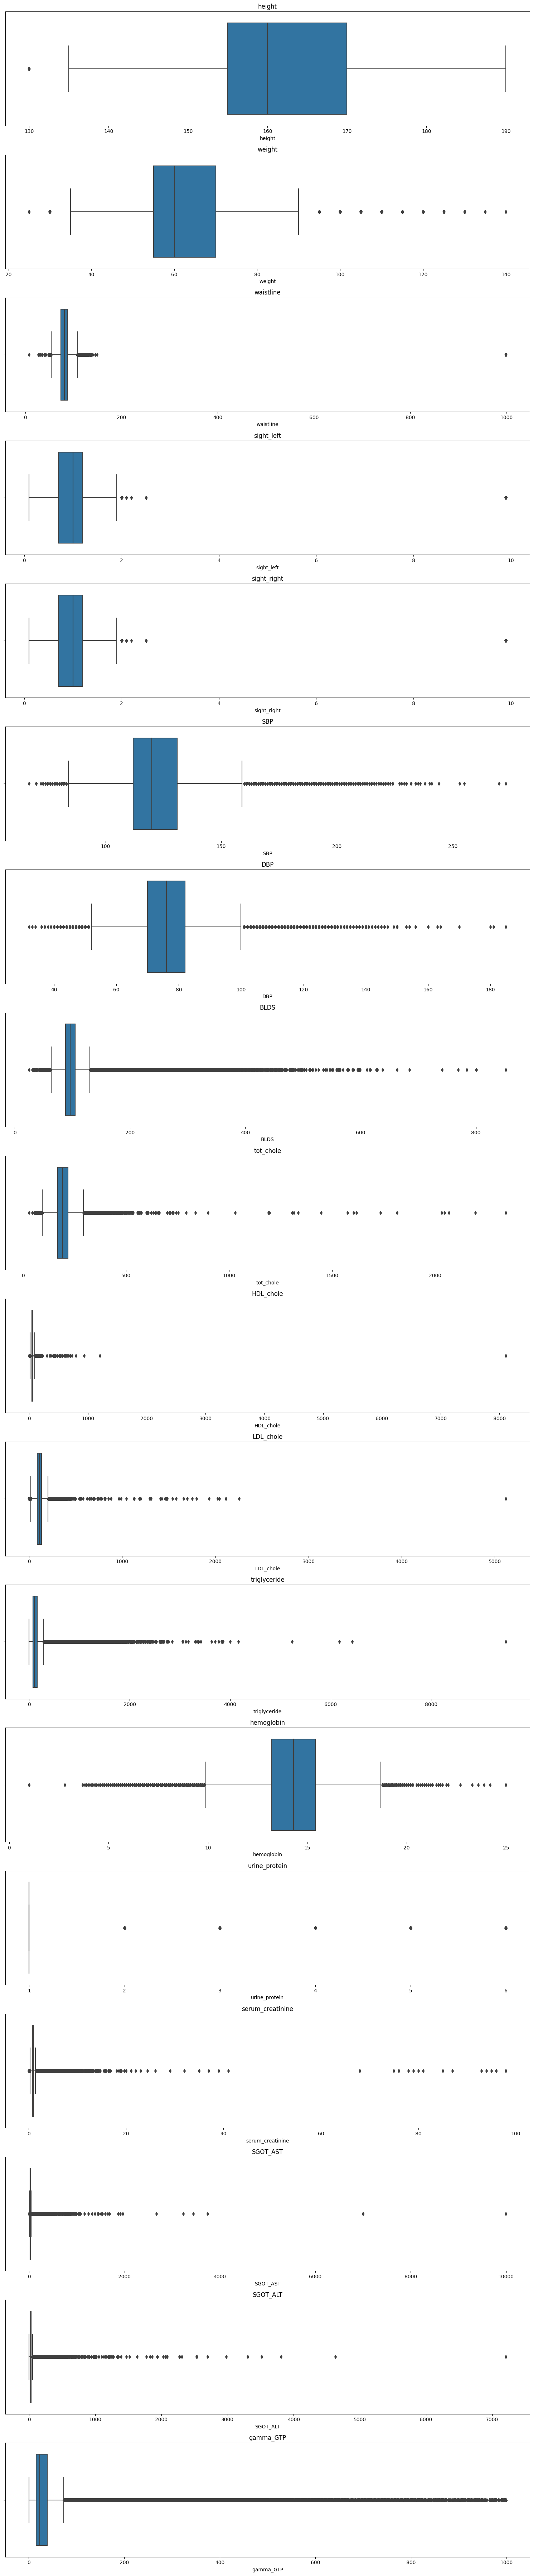

In [ ]:
# Selecting numerical columns for the box plot, excluding 'sex', 'hear_left', 'hear_right', and target variables
excluded_columns = ['sex', 'hear_left', 'hear_right', 'SMK_stat_type_cd', 'DRK_YN']
selected_columns = [col for col in numeric_columns if col not in excluded_columns]

# Generating separate box plots for the selected numerical columns
num_selected_columns = len(selected_columns)
plt.figure(figsize=(15, 4 * num_selected_columns))

for i, col in enumerate(selected_columns):
    plt.subplot(num_selected_columns, 1, i + 1)
    sns.boxplot(x=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()


### Conclusion:
1. No Transformation Needed:

- Height, DBP (Diastolic Blood Pressure), Hemoglobin, Sight_Left, Sight_Right:
  - These variables showed relatively symmetric distributions with fewer apparent outliers, so no transformation seems necessary.

2. Logarithmic Transformation:

- BLDS (Fasting Blood Glucose Level), HDL_Chole (HDL Cholesterol Level), LDL_Chole (LDL Cholesterol Level), Triglyceride, Urine_Protein, Serum_Creatinine, SGOT_AST, SGOT_ALT, Gamma_GTP:
  - These variables exhibited significant right-skewness and had outliers predominantly on the higher end. A logarithmic transformation is suitable to reduce skewness and the impact of outliers.
3. Both Logarithmic and Square Root Transformation:

- Weight, Waistline, Tot_Chole (Total Cholesterol Level):
  - For these variables, the choice between logarithmic and square root transformation could be based on the extent of skewness. Logarithmic transformation is more effective for highly skewed data, while square root transformation is milder and suitable for moderately skewed data.
  - We decide to apply square root transformation for these columns.
4. Square Root Transformation:

- SBP (Systolic Blood Pressure):
  - Given its slightly right-skewed distribution, a square root transformation can be effective. It's a milder transformation compared to logarithmic and can adequately handle the slight skewness.

In [4]:
# Columns to apply logarithmic transformation
log_transform_columns = ["BLDS", "HDL_chole", "LDL_chole", "triglyceride",
                         "urine_protein", "serum_creatinine", "SGOT_AST", "SGOT_ALT", "gamma_GTP"]

# Applying logarithmic transformation
for column in log_transform_columns:
    data[f"log_{column}"] = np.log(data[column])

# Columns to apply square root transformation
sqrt_transform_columns = ["weight", "waistline", "tot_chole", "SBP"]

# Applying square root transformation
for column in sqrt_transform_columns:
    data[f"sqrt_{column}"] = np.sqrt(data[column])

# Dropping previous transformed columns if they exist
data = data.drop(columns=[f"log_{col}" for col in log_transform_columns] + [f"sqrt_{col}" for col in sqrt_transform_columns], errors='ignore')

data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


## Encoding the categorical variables
-  "Sex" column:
  - 0 to 'Male'
  - 1 to 'Female'
- "DRK_YN" column:
  - 0 to 'N' (Non-Drinker)
  - 1 to 'Y' (Drinker)

In [5]:
# Create a copy of the dataset to avoid modifying the original one
data_encoded = data.copy()

# Initialize label encoders
label_encoder_sex = LabelEncoder()
label_encoder_drk = LabelEncoder()

# Apply label encoding to the 'sex' and 'DRK_YN' columns
data_encoded['sex'] = label_encoder_sex.fit_transform(data_encoded['sex'])
data_encoded['DRK_YN'] = label_encoder_drk.fit_transform(data_encoded['DRK_YN'])

# Display the first few rows of the transformed dataset
data_encoded

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,45,175,80,92.1,1.5,1.5,1.0,1.0,114.0,...,125.0,132.0,15.0,1.0,1.0,26.0,36.0,27.0,1.0,0
991342,1,35,170,75,86.0,1.0,1.5,1.0,1.0,119.0,...,84.0,45.0,15.8,1.0,1.1,14.0,17.0,15.0,1.0,0
991343,0,40,155,50,68.0,1.0,0.7,1.0,1.0,110.0,...,77.0,157.0,14.3,1.0,0.8,30.0,27.0,17.0,3.0,1
991344,1,25,175,60,72.0,1.5,1.0,1.0,1.0,119.0,...,73.0,53.0,14.5,1.0,0.8,21.0,14.0,17.0,1.0,0


- The distribution of the target variables

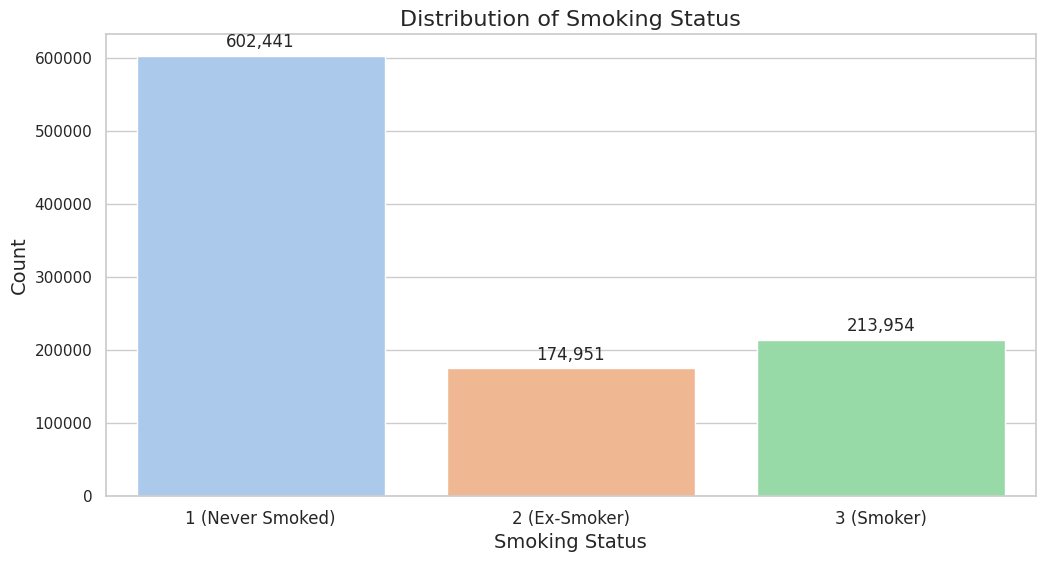

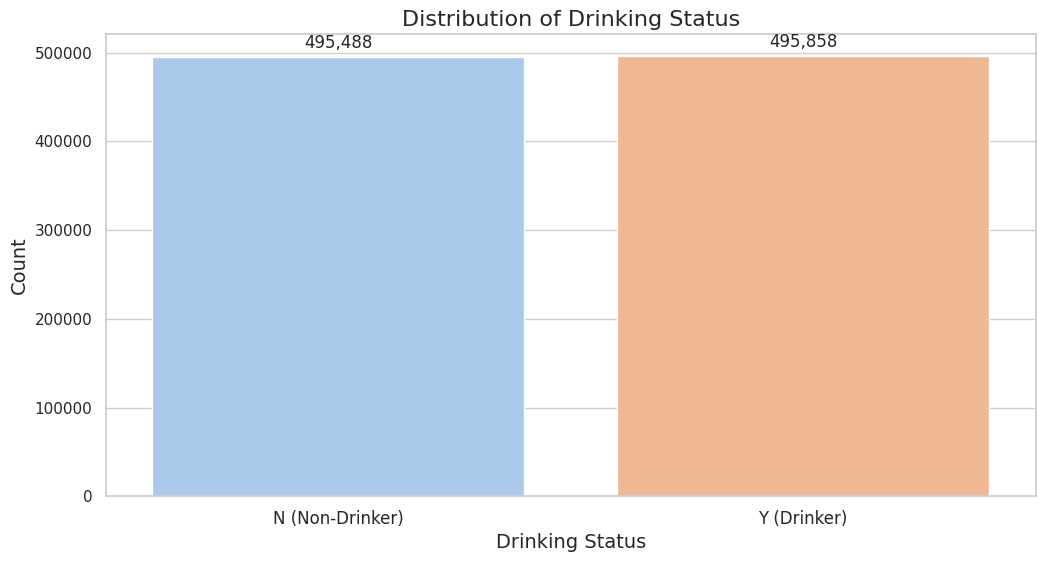

In [6]:
# Setting a larger plot style
sns.set(style="whitegrid", palette="pastel")

# Plotting the distribution of SMK_stat_type_cd
plt.figure(figsize=(12, 6))
smoking_plot = sns.countplot(x='SMK_stat_type_cd', data=data)
smoking_plot.set_title('Distribution of Smoking Status', fontsize=16)
smoking_plot.set_xlabel('Smoking Status', fontsize=14)
smoking_plot.set_ylabel('Count', fontsize=14)
smoking_plot.set_xticklabels(['1 (Never Smoked)', '2 (Ex-Smoker)', '3 (Smoker)'], fontsize=12)
for p in smoking_plot.patches:
    smoking_plot.annotate(f'{int(p.get_height()):,}',
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha='center', va='center',
                          xytext=(0, 10),
                          textcoords='offset points')
plt.show()

# Plotting the distribution of DRK_YN
plt.figure(figsize=(12, 6))
drinking_plot = sns.countplot(x='DRK_YN', data=data)
drinking_plot.set_title('Distribution of Drinking Status', fontsize=16)
drinking_plot.set_xlabel('Drinking Status', fontsize=14)
drinking_plot.set_ylabel('Count', fontsize=14)
drinking_plot.set_xticklabels(['N (Non-Drinker)', 'Y (Drinker)'], fontsize=12)
for p in drinking_plot.patches:
    drinking_plot.annotate(f'{int(p.get_height()):,}',
                           (p.get_x() + p.get_width() / 2., p.get_height()),
                           ha='center', va='center',
                           xytext=(0, 10),
                           textcoords='offset points')
plt.show()


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  int64  
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

In [7]:
# Dataset with SMK_stat_type_cd as the target variable
smk_data = data_encoded.drop(columns=['DRK_YN'])
smk_data.rename(columns={'SMK_stat_type_cd': 'smk_target'}, inplace=True)

smk_data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,smk_target
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0


In [8]:
# Dataset with DRK_YN as the target variable
drk_data = data_encoded.drop(columns=['SMK_stat_type_cd'])
drk_data.rename(columns={'DRK_YN': 'drk_target'}, inplace=True)

drk_data.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,drk_target
0,1,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,48.0,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1
1,1,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,55.0,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,0
2,1,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,41.0,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,0
3,1,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,76.0,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,0
4,1,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,61.0,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,0


## Feature Extraction for smk_data, drk_data, and smote_smk_data

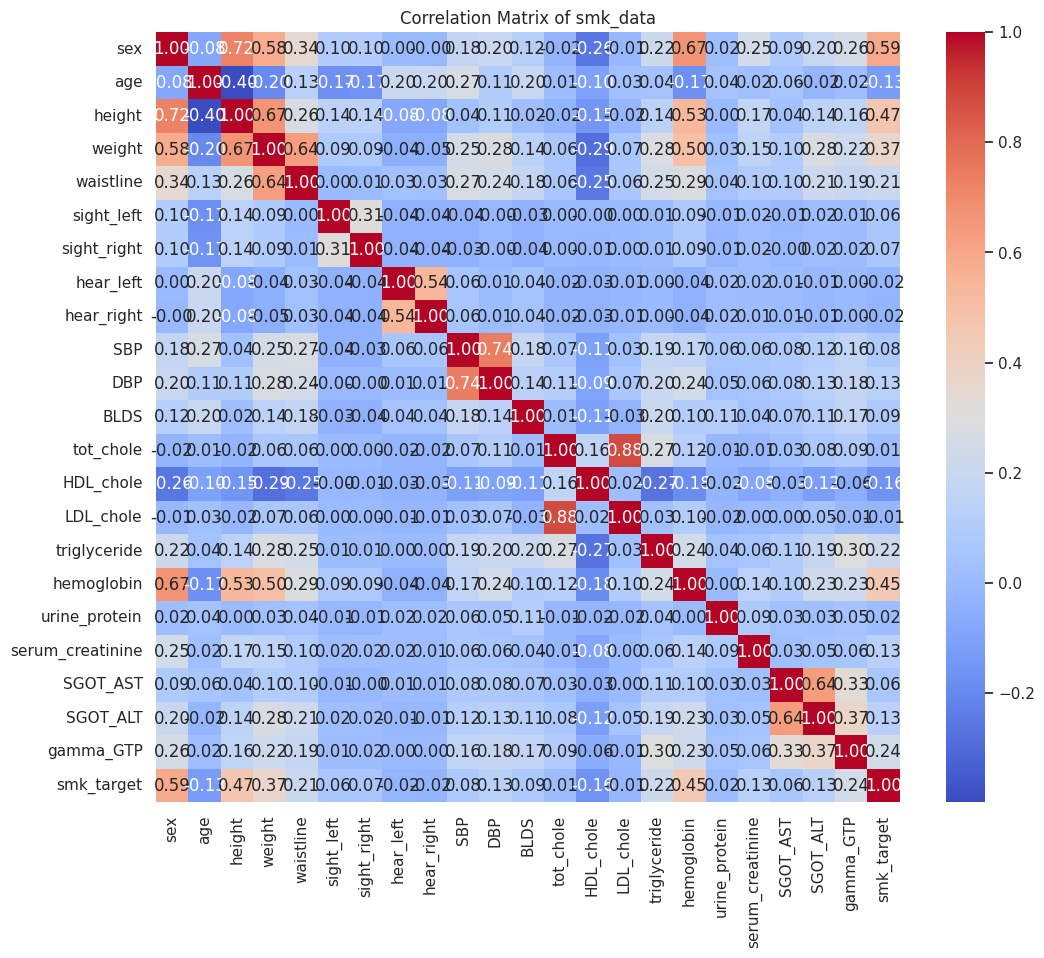

In [11]:
# Calculate the correlation matrix
correlation_matrix_smk = smk_data.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_smk, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of smk_data")
plt.show()

In [12]:
# Identify features highly correlated with the target (assuming target is numeric)
target_correlation_smk = correlation_matrix_smk['smk_target'].abs().sort_values(ascending=False)
highly_correlated_features_smk = target_correlation_smk[1:]  # Exclude the target itself

# Select a threshold for correlation strength
correlation_threshold = 0.08
selected_features_smk = highly_correlated_features_smk[highly_correlated_features_smk >= correlation_threshold].index.tolist()

# Print the selected features
print("Selected features based on correlation:")
print(selected_features_smk)

Selected features based on correlation:
['sex', 'height', 'hemoglobin', 'weight', 'gamma_GTP', 'triglyceride', 'waistline', 'HDL_chole', 'SGOT_ALT', 'serum_creatinine', 'DBP', 'age', 'BLDS', 'SBP']


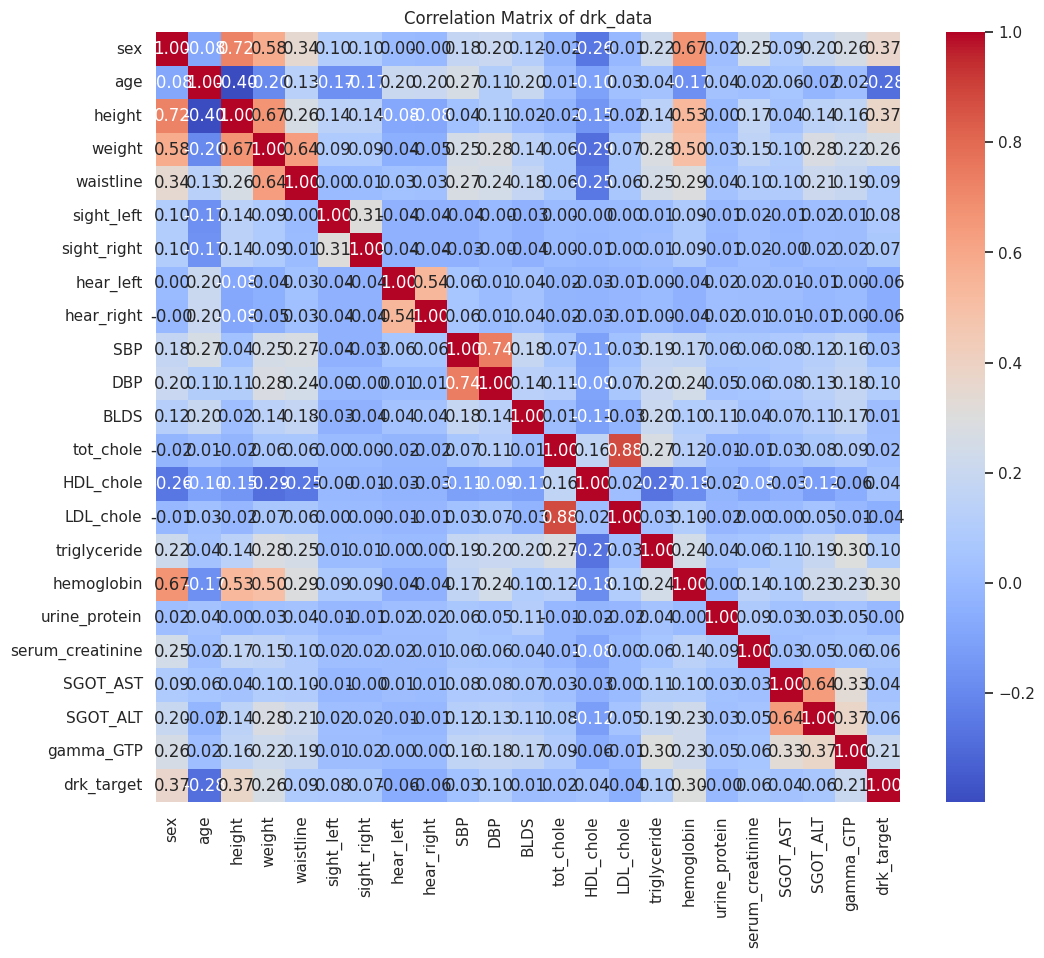

In [13]:
# Calculate the correlation matrix
correlation_matrix_drk = drk_data.corr()

# Plot a heatmap to visualize the correlations
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_drk, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of drk_data")
plt.show()

In [14]:
# Identify features highly correlated with the target (assuming target is numeric)
target_correlation_drk = correlation_matrix_drk['drk_target'].abs().sort_values(ascending=False)
highly_correlated_features_drk = target_correlation_drk[1:]  # Exclude the target itself

# Select a threshold for correlation strength
correlation_threshold = 0.06
selected_features_drk = highly_correlated_features_drk[highly_correlated_features_drk >= correlation_threshold].index.tolist()

# Print the selected features
print("Selected features based on correlation:")
print(selected_features_drk)

Selected features based on correlation:
['height', 'sex', 'hemoglobin', 'age', 'weight', 'gamma_GTP', 'triglyceride', 'DBP', 'waistline', 'sight_left', 'sight_right', 'SGOT_ALT', 'serum_creatinine']


In [45]:
# Create a new dataset with selected features
smk_data_selected = smk_data[selected_features_smk + ['smk_target']]

# Display the first few rows of the new dataset
smk_data_selected

,sex,height,hemoglobin,weight,gamma_GTP,triglyceride,waistline,HDL_chole,SGOT_ALT,serum_creatinine,DBP,age,BLDS,SBP,smk_target
0,1,170,17.1,75,40.0,92.0,90.0,48.0,35.0,1.0,80.0,35,99.0,120.0,1.0
1,1,180,15.8,80,27.0,121.0,89.0,55.0,36.0,0.9,82.0,30,106.0,130.0,3.0
2,1,165,15.8,75,68.0,104.0,91.0,41.0,32.0,0.9,70.0,40,98.0,120.0,1.0
3,1,175,17.6,80,18.0,106.0,91.0,76.0,34.0,1.1,87.0,50,95.0,145.0,1.0
4,1,165,13.8,60,25.0,104.0,80.0,61.0,12.0,0.8,82.0,50,101.0,138.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,1,175,15.0,80,27.0,132.0,92.1,46.0,36.0,1.0,80.0,45,88.0,114.0,1.0
991342,1,170,15.8,75,15.0,45.0,86.0,40.0,17.0,1.1,83.0,35,83.0,119.0,1.0
991343,0,155,14.3,50,17.0,157.0,68.0,96.0,27.0,0.8,70.0,40,90.0,110.0,3.0
991344,1,175,14.5,60,17.0,53.0,72.0,38.0,14.0,0.8,74.0,25,69.0,119.0,1.0


In [46]:
# Create a new dataset with selected features
drk_data_selected = drk_data[selected_features_drk + ['drk_target']]

# Display the first few rows of the new dataset
drk_data_selected

,height,sex,hemoglobin,age,weight,gamma_GTP,triglyceride,DBP,waistline,sight_left,sight_right,SGOT_ALT,serum_creatinine,drk_target
0,170,1,17.1,35,75,40.0,92.0,80.0,90.0,1.0,1.0,35.0,1.0,1
1,180,1,15.8,30,80,27.0,121.0,82.0,89.0,0.9,1.2,36.0,0.9,0
2,165,1,15.8,40,75,68.0,104.0,70.0,91.0,1.2,1.5,32.0,0.9,0
3,175,1,17.6,50,80,18.0,106.0,87.0,91.0,1.5,1.2,34.0,1.1,0
4,165,1,13.8,50,60,25.0,104.0,82.0,80.0,1.0,1.2,12.0,0.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991341,175,1,15.0,45,80,27.0,132.0,80.0,92.1,1.5,1.5,36.0,1.0,0
991342,170,1,15.8,35,75,15.0,45.0,83.0,86.0,1.0,1.5,17.0,1.1,0
991343,155,0,14.3,40,50,17.0,157.0,70.0,68.0,1.0,0.7,27.0,0.8,1
991344,175,1,14.5,25,60,17.0,53.0,74.0,72.0,1.5,1.0,14.0,0.8,0


# Splitting the data set into train/val/test
- Train : Validation : Test = 60 : 20 : 20

In [47]:
from sklearn.model_selection import train_test_split

In [52]:
# Separate the features and the target variable
X_smk = smk_data_selected.drop(columns=['smk_target'])
y_smk = smk_data_selected['smk_target']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train_smk, X_temp_smk, y_train_smk, y_temp_smk = train_test_split(X_smk, y_smk, test_size=0.4, random_state=42)
X_val_smk, X_test_smk, y_val_smk, y_test_smk = train_test_split(X_temp_smk, y_temp_smk, test_size=0.5, random_state=42)

print("Training set:", X_train_smk.shape, y_train_smk.shape)
print("Validation set:", X_val_smk.shape, y_val_smk.shape)
print("Test set:", X_test_smk.shape, y_test_smk.shape)

Training set: (594807, 14) (594807,)
Validation set: (198269, 14) (198269,)
Test set: (198270, 14) (198270,)


In [53]:
# Separate the features and the target variable
X_drk = drk_data_selected.drop(columns=['drk_target'])
y_drk = drk_data_selected['drk_target']

# Split the data into training (60%), validation (20%), and test (20%) sets
X_train_drk, X_temp_drk, y_train_drk, y_temp_drk = train_test_split(X_drk, y_drk, test_size=0.4, random_state=42)
X_val_drk, X_test_drk, y_val_drk, y_test_drk = train_test_split(X_temp_drk, y_temp_drk, test_size=0.5, random_state=42)

print("Training set:", X_train_drk.shape, y_train_drk.shape)
print("Validation set:", X_val_drk.shape, y_val_drk.shape)
print("Test set:", X_test_drk.shape, y_test_drk.shape)

Training set: (594807, 13) (594807,)
Validation set: (198269, 13) (198269,)
Test set: (198270, 13) (198270,)


## Using SMOTE to handle the Imablance in the 'SMK_stat_type_cd'

In [54]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_smk, y_train_smk)

print("Training set:", X_train_smote.shape, y_train_smote.shape)
print("Validation set:", X_val_smk.shape, y_val_smk.shape)
print("Test set:", X_test_smk.shape, y_test_smk.shape)

Training set: (1084254, 14) (1084254,)
Validation set: (198269, 14) (198269,)
Test set: (198270, 14) (198270,)


In [62]:
# Before SMOTE
print("Class distribution before SMOTE:\n", y_train_smk.value_counts())
print("\n")
# After SMOTE
print("Class distribution after SMOTE:\n", y_train_smote.value_counts())

Class distribution before SMOTE:
 1.0    361418
3.0    128143
2.0    105246
Name: smk_target, dtype: int64


Class distribution after SMOTE:
 3.0    361418
1.0    361418
2.0    361418
Name: smk_target, dtype: int64


# Baseline Model using Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [63]:
# Create Logistic Regression models
baseline_model_smk = LogisticRegression(multi_class='multinomial', max_iter=100)
baseline_model_drk = LogisticRegression()
baseline_model_smote = LogisticRegression(multi_class='multinomial', max_iter=100)

# Train the models on the training data
baseline_model_smk.fit(X_train_smk, y_train_smk)
baseline_model_drk.fit(X_train_drk, y_train_drk)
baseline_model_smote.fit(X_train_smote, y_train_smote)

# Predictions on the validation set
y_pred_val_lr_smk = baseline_model_smk.predict(X_val_smk)
y_pred_val_lr_drk = baseline_model_drk.predict(X_val_drk)
y_pred_val_lr_smote = baseline_model_smote.predict(X_val_smk)

# Evaluate the model for the smoking dataset
accuracy_smk = accuracy_score(y_val_smk, y_pred_val_lr_smk)
precision_smk = precision_score(y_val_smk, y_pred_val_lr_smk, average='weighted')  # Use 'weighted' for multi-class
recall_smk = recall_score(y_val_smk, y_pred_val_lr_smk, average='weighted')  # Use 'weighted' for multi-class
f1_smk = f1_score(y_val_smk, y_pred_val_lr_smk, average='weighted')  # Use 'weighted' for multi-class
roc_auc_smk = roc_auc_score(y_val_smk, baseline_model_smk.predict_proba(X_val_smk), multi_class='ovr')  # Use 'ovr' for multi-class

# Confusion matrix for smoking dataset
confusion_matrix_smk = confusion_matrix(y_val_smk, y_pred_val_lr_smk)

# Evaluate the model for the drinking dataset
accuracy_drk = accuracy_score(y_val_drk, y_pred_val_lr_drk)
precision_drk = precision_score(y_val_drk, y_pred_val_lr_drk)
recall_drk = recall_score(y_val_drk, y_pred_val_lr_drk)
f1_drk = f1_score(y_val_drk, y_pred_val_lr_drk)
roc_auc_drk = roc_auc_score(y_val_drk, baseline_model_drk.predict_proba(X_val_drk)[:, 1])  # For binary classification

# Confusion matrix for drinking dataset
confusion_matrix_drk = confusion_matrix(y_val_drk, y_pred_val_lr_drk)

# Evaluate the model for the smoking dataset
accuracy_smote = accuracy_score(y_val_smk, y_pred_val_lr_smote)
precision_smote = precision_score(y_val_smk, y_pred_val_lr_smote, average='weighted')  # Use 'weighted' for multi-class
recall_smote = recall_score(y_val_smk, y_pred_val_lr_smote, average='weighted')  # Use 'weighted' for multi-class
f1_smote = f1_score(y_val_smk, y_pred_val_lr_smote, average='weighted')  # Use 'weighted' for multi-class
roc_auc_smote = roc_auc_score(y_pred_val_lr_smote, baseline_model_smk.predict_proba(X_val_smk), multi_class='ovr')  # Use 'ovr' for multi-class

# Confusion matrix for SMOTE dataset
confusion_matrix_smote = confusion_matrix(y_val_smk, y_pred_val_lr_smote)


# Print the evaluation metrics for the smoking dataset
print("\n----- Logistic Regression of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}")
print(f"Precision: {precision_smk:.4f}")
print(f"Recall: {recall_smk:.4f}")
print(f"F1 Score: {f1_smk:.4f}")
print(f"ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

# Print the evaluation metrics for the drinking dataset
print("\n----- Logistic Regression of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}")
print(f"Precision: {precision_drk:.4f}")
print(f"Recall: {recall_drk:.4f}")
print(f"F1 Score: {f1_drk:.4f}")
print(f"ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

# Print the evaluation metrics for the SMOTE dataset
print("\n----- Logistic Regression of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}")
print(f"Precision: {precision_smote:.4f}")
print(f"Recall: {recall_smote:.4f}")
print(f"F1 Score: {f1_smote:.4f}")
print(f"ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c


----- Logistic Regression of Smoking data -----
Accuracy: 0.6468
Precision: 0.5963
Recall: 0.6468
F1 Score: 0.6006
ROC AUC: 0.7642
Confusion Matrix:
 [[108674   3750   8259]
 [ 23619   4347   6809]
 [ 23748   3843  15220]]

----- Logistic Regression of Drinking data -----
Accuracy: 0.7132
Precision: 0.7135
Recall: 0.7124
F1 Score: 0.7130
ROC AUC: 0.7826
Confusion Matrix:
 [[70757 28360]
 [28513 70639]]

----- Logistic Regression of SMOTE data -----
Accuracy: 0.5967
Precision: 0.6579
Recall: 0.5967
F1 Score: 0.6174
ROC AUC: 0.9435
Confusion Matrix:
 [[79259 23096 18328]
 [ 7924 16747 10104]
 [ 8009 12495 22307]]


# Application Machine Learning

# 1. CatBoost

In [65]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 17.4 MB/s eta 0:00:00


In [66]:
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

In [67]:
cb_smk = CatBoostClassifier(verbose=0, task_type='CPU', loss_function='MultiClass')
cb_drk = CatBoostClassifier(verbose=0, task_type='CPU', loss_function='Logloss')
cb_smote = CatBoostClassifier(verbose=0, task_type='CPU', loss_function='MultiClass')

cb_smk.fit(X_train_smk, y_train_smk)
cb_drk.fit(X_train_drk, y_train_drk)
cb_smote.fit(X_train_smote, y_train_smote)

y_pred_val_cb_smk = cb_smk.predict(X_val_smk)
y_pred_val_cb_drk = cb_drk.predict(X_val_drk)
y_pred_val_cb_smote = cb_smote.predict(X_val_smk)

In [68]:
# Function to calculate metrics for multi-class classification
def evaluate_multi(y_true, y_pred, model, X):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, model.predict_proba(X), multi_class='ovr')
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, roc_auc, cm

# Function to calculate metrics for binary classification
def evaluate_bi(y_true, y_pred, model, X):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    roc_auc = roc_auc_score(y_true, model.predict_proba(X)[:, 1])  # For binary classification
    cm = confusion_matrix(y_true, y_pred)

    return accuracy, precision, recall, f1, roc_auc, cm

In [70]:
# Evaluate the models
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_val_cb_smk, cb_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_val_cb_drk, cb_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_val_cb_smote, cb_smote, X_val_smk)

In [71]:
# Print the evaluation metrics
print("\n----- CatBoost of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- CatBoost of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- CatBoost of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- CatBoost of Smoking data -----
Accuracy: 0.7008, Precision: 0.7064, Recall: 0.7008, F1 Score: 0.7029, ROC AUC: 0.8473
Confusion Matrix:
 [[99193 10065 11425]
 [ 8287 14365 12123]
 [ 9325  8092 25394]]

----- CatBoost of Drinking data -----
Accuracy: 0.7231, Precision: 0.7148, Recall: 0.7426, F1 Score: 0.7284, ROC AUC: 0.8020
Confusion Matrix:
 [[69738 29379]
 [25524 73628]]

----- CatBoost of SMOTE data -----
Accuracy: 0.6998, Precision: 0.7165, Recall: 0.6998, F1 Score: 0.7067, ROC AUC: 0.8467
Confusion Matrix:
 [[97119 11717 11847]
 [ 6697 16200 11878]
 [ 8052  9323 25436]]


## 2.  LightGBM

In [74]:
pip install lightgbm

In [72]:
import lightgbm as lgb

In [73]:
lgbm_smk = lgb.LGBMClassifier()
lgbm_drk = lgb.LGBMClassifier()
lgbm_smote = lgb.LGBMClassifier()

lgbm_smk.fit(X_train_smk, y_train_smk)
lgbm_drk.fit(X_train_drk, y_train_drk)
lgbm_smote.fit(X_train_smote, y_train_smote)

y_pred_val_lgbm_smk = lgbm_smk.predict(X_val_smk)
y_pred_val_lgbm_drk = lgbm_drk.predict(X_val_drk)
y_pred_val_lgbm_smote = lgbm_smote.predict(X_val_smk)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1919
[LightGBM] [Info] Number of data points in the train set: 594807, number of used features: 14
[LightGBM] [Info] Start training from score -0.498202
[LightGBM] [Info] Start training from score -1.731937
[LightGBM] [Info] Start training from score -1.535090
[LightGBM] [Info] Number of positive: 297548, number of negative: 297259
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1433
[LightGBM] [Info] Number of data points in the train set: 594807, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500243 

In [80]:
accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_val_lgbm_smk, lgbm_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_val_lgbm_drk, lgbm_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_val_lgbm_smote, lgbm_smote, X_val_smk)

print("\n----- LightGBM of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- LightGBM of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- LightGBM of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- LightGBM of Smoking data -----
Accuracy: 0.7008, Precision: 0.7066, Recall: 0.7008, F1 Score: 0.7030, ROC AUC: 0.8470
Confusion Matrix:
 [[99132 10118 11433]
 [ 8228 14477 12070]
 [ 9355  8122 25334]]

----- LightGBM of Drinking data -----
Accuracy: 0.7243, Precision: 0.7150, Recall: 0.7462, F1 Score: 0.7302, ROC AUC: 0.8025
Confusion Matrix:
 [[69619 29498]
 [25165 73987]]

----- LightGBM of SMOTE data -----
Accuracy: 0.6981, Precision: 0.7187, Recall: 0.6981, F1 Score: 0.7065, ROC AUC: 0.8458
Confusion Matrix:
 [[96134 12278 12271]
 [ 6265 16607 11903]
 [ 7710  9424 25677]]


# Hyperparameter Tuning

## 1. CatBoost after tuning

In [90]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [85]:
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [30, 50, 100]
}

catboost_smk = CatBoostClassifier(task_type='CPU', verbose=0, loss_function='MultiClass')
catboost_drk = CatBoostClassifier(task_type='CPU', verbose=0, loss_function='Logloss')
catboost_smote = CatBoostClassifier(task_type='CPU', verbose=0, loss_function='MultiClass')

grid_smk = GridSearchCV(estimator=catboost_smk, param_grid=param_grid, cv=3, scoring='accuracy')
grid_drk = GridSearchCV(estimator=catboost_drk, param_grid=param_grid, cv=3, scoring='accuracy')
grid_smote = GridSearchCV(estimator=catboost_smote, param_grid=param_grid, cv=3, scoring='accuracy')

In [86]:
grid_smk.fit(X_train_smk, y_train_smk)
print("Best parameters for smk_data:", grid_smk.best_params_)

grid_drk.fit(X_train_drk, y_train_drk)
print("Best parameters for drk_data:", grid_drk.best_params_)

grid_smote.fit(X_train_smote, y_train_smote)
print("Best parameters for smote_smk_data:", grid_smote.best_params_)

Best parameters for smk_data: {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}
Best parameters for drk_data: {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}
Best parameters for smote_smk_data: {'depth': 10, 'iterations': 30, 'learning_rate': 0.05}


In [87]:
best_cb_smk = grid_smk.best_estimator_
best_cb_drk = grid_drk.best_estimator_
best_cb_smote = grid_smote.best_estimator_

y_pred_cb_tuned_smk = best_cb_smk.predict(X_val_smk)
y_pred_cb_tuned_drk = best_cb_drk.predict(X_val_drk)
y_pred_cb_tuned_smote = best_cb_smote.predict(X_val_smk)

accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_cb_tuned_smk, best_cb_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_cb_tuned_drk, best_cb_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_cb_tuned_smote, best_cb_smote, X_val_smk)

print("\n----- Tuned CatBoost of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Tuned CatBoost of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Tuned CatBoost of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Tuned CatBoost of Smoking data -----
Accuracy: 0.7003, Precision: 0.7069, Recall: 0.7003, F1 Score: 0.7027, ROC AUC: 0.8470
Confusion Matrix:
 [[98971 10116 11596]
 [ 8142 14356 12277]
 [ 9191  8095 25525]]

----- Tuned CatBoost of Drinking data -----
Accuracy: 0.7247, Precision: 0.7149, Recall: 0.7477, F1 Score: 0.7309, ROC AUC: 0.8029
Confusion Matrix:
 [[69549 29568]
 [25012 74140]]

----- Tuned CatBoost of SMOTE data -----
Accuracy: 0.6770, Precision: 0.7467, Recall: 0.6770, F1 Score: 0.6988, ROC AUC: 0.8377
Confusion Matrix:
 [[87676 15733 17274]
 [ 2159 19854 12762]
 [ 3276 12828 26707]]


In [88]:
import pickle

# Save the best CatBoost models as pickle files
with open('best_cb_smk.pkl', 'wb') as file:
    pickle.dump(best_cb_smk, file)

with open('best_cb_drk.pkl', 'wb') as file:
    pickle.dump(best_cb_drk, file)

with open('best_cb_smote.pkl', 'wb') as file:
    pickle.dump(best_cb_smote, file)

## 2.  LightGBM after tuning

In [91]:
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300]
}

lgbm_smk = lgb.LGBMClassifier()
lgbm_drk = lgb.LGBMClassifier()
lgbm_smote = lgb.LGBMClassifier()

stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

grid_smk = GridSearchCV(estimator=lgbm_smk, param_grid=param_grid, cv=stratified_kfold, scoring='f1_weighted')
grid_drk = GridSearchCV(estimator=lgbm_drk, param_grid=param_grid, cv=3, scoring='accuracy')
grid_smote = GridSearchCV(estimator=lgbm_smote, param_grid=param_grid, cv=3, scoring='accuracy')

In [92]:
grid_smk.fit(X_train_smk, y_train_smk)
print("Best parameters for smk_data:", grid_smk.best_params_)

grid_drk.fit(X_train_drk, y_train_drk)
print("Best parameters for drk_data:", grid_drk.best_params_)

grid_smote.fit(X_train_smote, y_train_smote)
print("Best parameters for smote_smk_data:", grid_smote.best_params_)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1913
[LightGBM] [Info] Number of data points in the train set: 396538, number of used features: 14
[LightGBM] [Info] Start training from score -0.498199
[LightGBM] [Info] Start training from score -1.731937
[LightGBM] [Info] Start training from score -1.535098
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002270 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1921
[LightGBM] [Info] Number of data points in the train set: 396538, number of used features: 14
[LightGBM] [Info] Start training from score -0.498203
[LightGBM] [Info] Start training from score -1.731937
[LightGBM] [Info] Star

In [93]:
best_lg_smk = grid_smk.best_estimator_
best_lg_drk = grid_drk.best_estimator_
best_lg_smote = grid_smote.best_estimator_

y_pred_lg_tuned_smk = best_lg_smk.predict(X_val_smk)
y_pred_lg_tuned_drk = best_lg_drk.predict(X_val_drk)
y_pred_lg_tuned_smote = best_lg_smote.predict(X_val_smk)

accuracy_smk, precision_smk, recall_smk, f1_smk, roc_auc_smk, confusion_matrix_smk = evaluate_multi(y_val_smk, y_pred_lg_tuned_smk, best_lg_smk, X_val_smk)
accuracy_drk, precision_drk, recall_drk, f1_drk, roc_auc_drk, confusion_matrix_drk = evaluate_bi(y_val_drk, y_pred_lg_tuned_drk, best_lg_drk, X_val_drk)
accuracy_smote, precision_smote, recall_smote, f1_smote, roc_auc_smote, confusion_matrix_smote = evaluate_multi(y_val_smk, y_pred_lg_tuned_smote, best_lg_smote, X_val_smk)

print("\n----- Tuned LightGBM of Smoking data -----")
print(f"Accuracy: {accuracy_smk:.4f}, Precision: {precision_smk:.4f}, Recall: {recall_smk:.4f}, F1 Score: {f1_smk:.4f}, ROC AUC: {roc_auc_smk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smk)

print("\n----- Tuned LightGBM of Drinking data -----")
print(f"Accuracy: {accuracy_drk:.4f}, Precision: {precision_drk:.4f}, Recall: {recall_drk:.4f}, F1 Score: {f1_drk:.4f}, ROC AUC: {roc_auc_drk:.4f}")
print("Confusion Matrix:\n", confusion_matrix_drk)

print("\n----- Tuned LightGBM of SMOTE data -----")
print(f"Accuracy: {accuracy_smote:.4f}, Precision: {precision_smote:.4f}, Recall: {recall_smote:.4f}, F1 Score: {f1_smote:.4f}, ROC AUC: {roc_auc_smote:.4f}")
print("Confusion Matrix:\n", confusion_matrix_smote)


----- Tuned LightGBM of Smoking data -----
Accuracy: 0.7007, Precision: 0.7066, Recall: 0.7007, F1 Score: 0.7029, ROC AUC: 0.8471
Confusion Matrix:
 [[99104 10116 11463]
 [ 8250 14440 12085]
 [ 9306  8120 25385]]

----- Tuned LightGBM of Drinking data -----
Accuracy: 0.7240, Precision: 0.7144, Recall: 0.7464, F1 Score: 0.7301, ROC AUC: 0.8022
Confusion Matrix:
 [[69535 29582]
 [25144 74008]]

----- Tuned LightGBM of SMOTE data -----
Accuracy: 0.6769, Precision: 0.7471, Recall: 0.6769, F1 Score: 0.6987, ROC AUC: 0.8360
Confusion Matrix:
 [[87540 15588 17555]
 [ 2145 20064 12566]
 [ 3234 12972 26605]]


In [94]:
with open('best_lg_smk.pkl', 'wb') as file:
    pickle.dump(best_lg_smk, file)

with open('best_lg_drk.pkl', 'wb') as file:
    pickle.dump(best_lg_drk, file)

with open('best_lg_smote.pkl', 'wb') as file:
    pickle.dump(best_lg_smote, file)

# please keep in mind that smoking data set is multi-class classification task and drinking data set is binary classification task
# So you should modify your code before you run it uniformly
# Save the model by pickle and DOWNLOAD them and share in discord